# He K. et al., 2015

He, K., Zhang, X., Ren, S., & Sun, J. (2015). Deep Residual Learning for Image Recognition. 2016 IEEE Conference on Computer Vision and Pattern Recognition (CVPR), 770-778.

- Incorpores preprocesses and augmentation layers
- Changes Output Layer

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Execution Enviroment

In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Sep  6 19:21:23 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0    44W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


In [4]:
!pip install --upgrade tensorflow==2.13.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 85.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 109.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 50.7 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.3
    Uninstalling tensorboard-2.12

In [5]:
from keras.applications import resnet
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tensorflow as tf
import tensorflow.keras as K


In [6]:
print(tf.__version__)

2.13.0


In [7]:
img_train = '/content/drive/MyDrive/Colab Notebooks/ProyFinal/Achive/train'
# img_train = "train"


traindataset = K.utils.image_dataset_from_directory(img_train,
                                                    label_mode='categorical',
                                                    color_mode='grayscale',
                                                    batch_size=32,
                                                    image_size=(48,48),
                                                    seed=7,
                                                    )

img_test = '/content/drive/MyDrive/Colab Notebooks/ProyFinal/Achive/test'
# img_test = "test"

testdataset = K.utils.image_dataset_from_directory(img_test,
                                                    label_mode='categorical',
                                                    color_mode='grayscale',
                                                    batch_size=32,
                                                    image_size=(48,48),
                                                    seed=7,
                                                    )


Found 28729 files belonging to 7 classes.
Found 7208 files belonging to 7 classes.


In [8]:
# Images from 1 to 3 channels

def convert_to_rgb(image, label):
    image_rgb = tf.repeat(image, repeats=3, axis=-1)
    return image_rgb, label


traindataset = traindataset.map(convert_to_rgb)
testdataset = testdataset.map(convert_to_rgb)

In [9]:
resnet50 = resnet.ResNet50(include_top=False)

94765736/94765736 [==============================] - 5s 0us/step


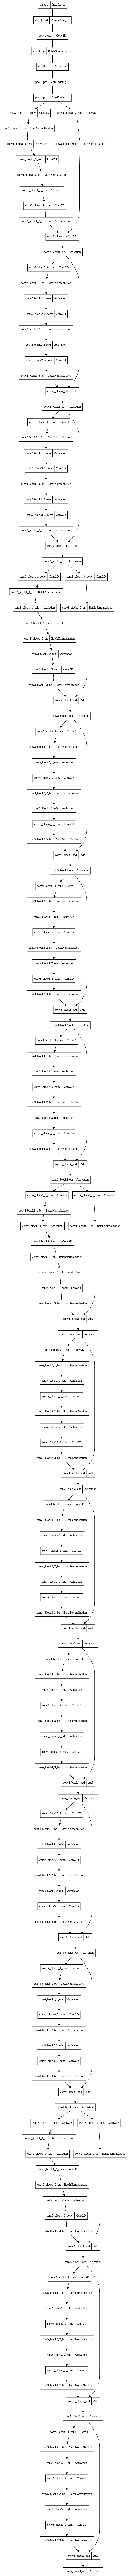

In [ ]:
from tensorflow.keras.utils import plot_model
import pydot

plot_model(resnet50,  to_file='inceptionv3.png')

In [10]:
for i, layer in enumerate(resnet50.layers):
    print('num {}, name = {}'.format(i, layer.name))

num 0, name = input_1
num 1, name = conv1_pad
num 2, name = conv1_conv
num 3, name = conv1_bn
num 4, name = conv1_relu
num 5, name = pool1_pad
num 6, name = pool1_pool
num 7, name = conv2_block1_1_conv
num 8, name = conv2_block1_1_bn
num 9, name = conv2_block1_1_relu
num 10, name = conv2_block1_2_conv
num 11, name = conv2_block1_2_bn
num 12, name = conv2_block1_2_relu
num 13, name = conv2_block1_0_conv
num 14, name = conv2_block1_3_conv
num 15, name = conv2_block1_0_bn
num 16, name = conv2_block1_3_bn
num 17, name = conv2_block1_add
num 18, name = conv2_block1_out
num 19, name = conv2_block2_1_conv
num 20, name = conv2_block2_1_bn
num 21, name = conv2_block2_1_relu
num 22, name = conv2_block2_2_conv
num 23, name = conv2_block2_2_bn
num 24, name = conv2_block2_2_relu
num 25, name = conv2_block2_3_conv
num 26, name = conv2_block2_3_bn
num 27, name = conv2_block2_add
num 28, name = conv2_block2_out
num 29, name = conv2_block3_1_conv
num 30, name = conv2_block3_1_bn
num 31, name = conv2_bl

In [11]:
for layer in resnet50.layers[143:]:
    layer.trainable = False

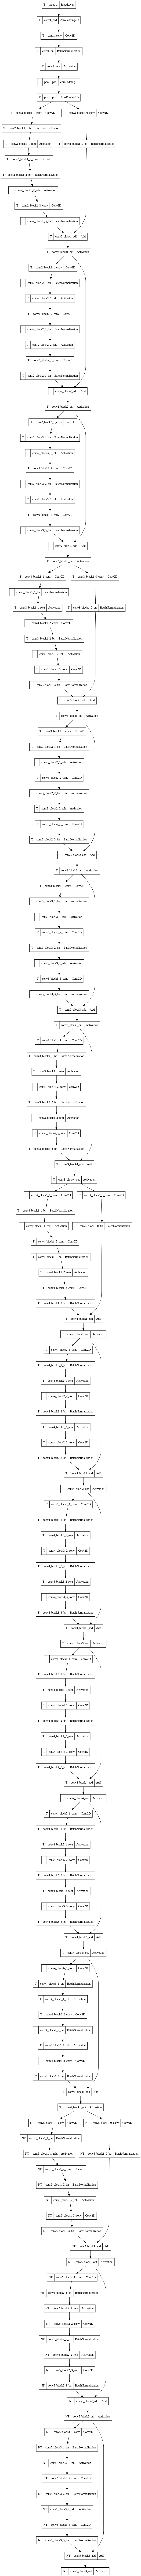

In [ ]:
plot_model(resnet50,  show_trainable=True, to_file='ResNetTrain.png')

In [12]:
model_path = '/content/drive/MyDrive/Colab Notebooks/ProyFinal/colabs/ResNet50.h5'
# model_path = 'ResNet50.h5'

input = K.Input(shape=(None, None, 3))

x = input
x = K.layers.experimental.preprocessing.Resizing(224, 224)(x)
x = resnet.preprocess_input(x)
x = K.layers.experimental.preprocessing.Rescaling(1./255)(x)
x = K.layers.experimental.preprocessing.RandomFlip('horizontal', 0)(x)
x = K.layers.experimental.preprocessing.RandomContrast([0.9, 1.1], 1)(x)
x = K.layers.experimental.preprocessing.RandomRotation((-0.2, 0.3), seed=2)(x)

x = resnet50(x)

x = Flatten()(x)

x = Dense(1000, activation='relu', kernel_initializer='he_normal')(x)
x = Dropout(0.5)(x)

output = Dense(7, activation='softmax', kernel_initializer='he_normal')(x)

model = K.Model(input, output)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_focal_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 tf.__operators__.getitem (  (None, 224, 224, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 224, 224, 3)       0         
 )                                                               
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 random_flip (RandomFlip)    (None, 224, 224, 3)       0     

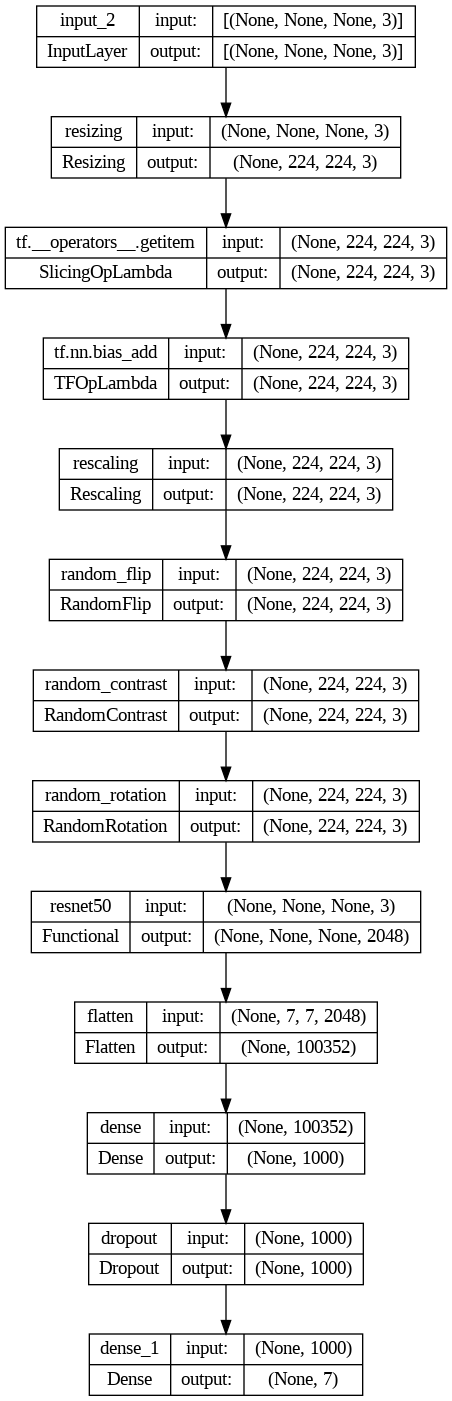

In [ ]:
K.utils.plot_model(model,  show_shapes=True, to_file="Resnet50_final.png")

In [13]:
def scheduler(epoch, lr):
    if epoch < 1:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

def cyclic_lr(epoch):
    base_lr = 0.00008
    max_lr = 0.0001
    step_size = 32.0
    cycle = np.floor(1 + epoch / (2 * step_size))
    x = np.abs(epoch / step_size - 2 * cycle + 1)
    lr = base_lr + (max_lr - base_lr) * np.maximum(0, (1 - x)) / float(2 ** (cycle - 1))
    return lr

best = [K.callbacks.ModelCheckpoint(model_path,
                                   save_best_only=True),
       K.callbacks.LearningRateScheduler(cyclic_lr),
       K.callbacks.EarlyStopping(monitor='val_loss',
                                patience=10,
                                verbose=1)
       ]

history = model.fit(traindataset,
                    validation_data=testdataset,
                    epochs=200,
                    verbose=True,
                    callbacks=best,
                    use_multiprocessing=True)

Epoch 1/200
898/898 [==============================] - ETA: 0s - loss: 0.3313 - accuracy: 0.3535

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


898/898 [==============================] - 2244s 2s/step - loss: 0.3313 - accuracy: 0.3535 - val_loss: 0.2602 - val_accuracy: 0.4030 - lr: 8.0000e-05
Epoch 2/200
898/898 [==============================] - 59s 62ms/step - loss: 0.2280 - accuracy: 0.4585 - val_loss: 0.2631 - val_accuracy: 0.4287 - lr: 8.0625e-05
Epoch 3/200
898/898 [==============================] - 65s 72ms/step - loss: 0.2096 - accuracy: 0.4923 - val_loss: 0.2309 - val_accuracy: 0.4699 - lr: 8.1250e-05
Epoch 4/200
898/898 [==============================] - 65s 72ms/step - loss: 0.1975 - accuracy: 0.5135 - val_loss: 0.2285 - val_accuracy: 0.4609 - lr: 8.1875e-05
Epoch 5/200
898/898 [==============================] - 65s 73ms/step - loss: 0.1889 - accuracy: 0.5308 - val_loss: 0.2157 - val_accuracy: 0.5060 - lr: 8.2500e-05
Epoch 6/200
898/898 [==============================] - 56s 62ms/step - loss: 0.1829 - accuracy: 0.5449 - val_loss: 0.2317 - val_accuracy: 0.4915 - lr: 8.3125e-05
Epoch 7/200
898/898 [===================

In [14]:
print(type(history.history))
print(history.history.keys())
largo = len(history.history['accuracy'])
largo

<class 'dict'>
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


36

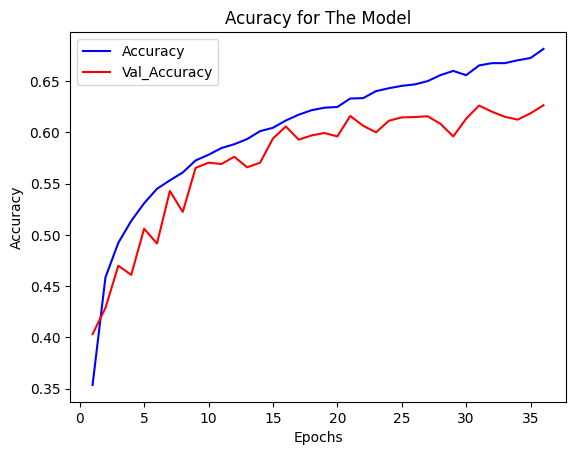

In [15]:
# Review Accuracy

plt.plot(range(1, largo + 1), history.history['accuracy'], '-b', label='Accuracy')
plt.plot(range(1, largo + 1), history.history['val_accuracy'], '-r', label='Val_Accuracy')
plt.title('Acuracy for The Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
eval = model.evaluate(testdataset, verbose=True, use_multiprocessing=True, return_dict=True)
print(eval)

226/226 [==============================] - 4s 16ms/step - loss: 0.1899 - accuracy: 0.6264
{'loss': 0.18994173407554626, 'accuracy': 0.626387357711792}


In [17]:
prediction = model.predict(testdataset)

y_true = []
y_pred = []

for x, y in testdataset:
    predictions = model.predict(x)

    predicted_classes = np.argmax(predictions, axis=1)

    true_classes = np.argmax(y.numpy(), axis=1)

    y_true.extend(true_classes)
    y_pred.extend(predicted_classes)

1/1 [==============================] - 1s 984ms/step


In [18]:
!pip install scikit-learn
!pip install seaborn

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

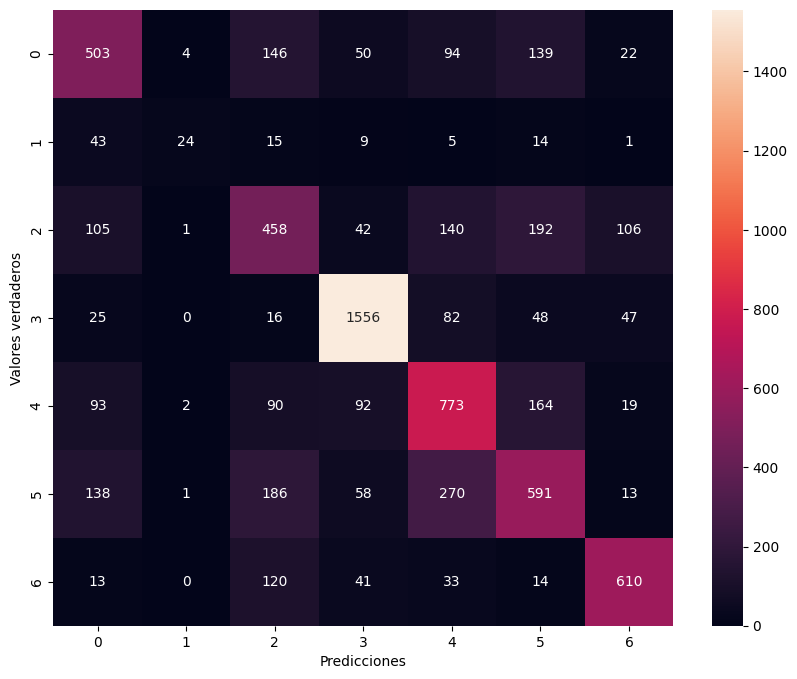

In [20]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos')
plt.show()
